# ROI Figures

This notebook generates the ROI plots for the paper.


In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path("..") / "src"))


## Parameters
Parameters match the paper; change only if exploring variants.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from metric_paper.plotting import set_plot_style
from metric_paper.roi_profit import RoiProfitParams, expected_roi, p_loss_roi, worst_roi

params = RoiProfitParams(L=0.7, U=0.8, N_max=1000, V=1.0)
eta = np.linspace(0.0, 1.0, 500)

out_dir = Path("..") / "figures"
out_dir.mkdir(exist_ok=True)

set_plot_style()


In [3]:
def set_eta_ticks(params):
    base = list(np.linspace(0.0, 1.0, 6))
    ticks = sorted(set(base + [params.L, params.U]))
    labels = [f"{t:.1f}" for t in ticks]
    plt.xticks(ticks, labels)

def mark_points(x_vals, y_vals, points):
    for x in points:
        y = np.interp(x, x_vals, y_vals)
        label = f"({x:.2f}, {y:.2f})"
        plt.scatter([x], [y], s=35, zorder=5, label=label)


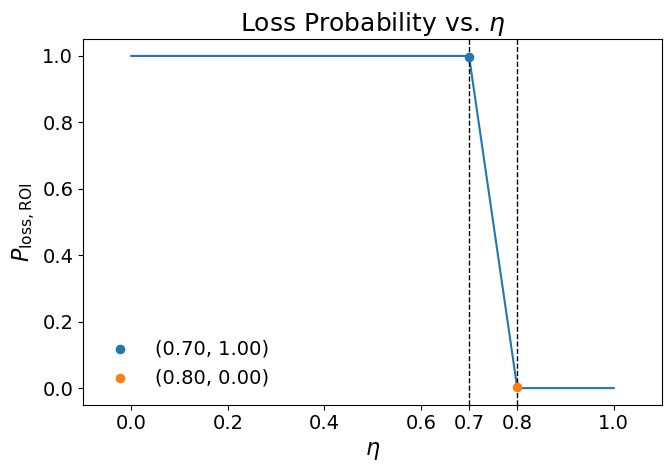

In [4]:
p_loss = p_loss_roi(eta, params)

plt.figure(figsize=(7, 5))
plt.plot(eta, p_loss)
plt.axvline(params.L, color="black", linestyle="--", linewidth=1)
plt.axvline(params.U, color="black", linestyle="--", linewidth=1)
mark_points(eta, p_loss, [params.L, params.U])
set_eta_ticks(params)
plt.xlim(-0.1, 1.1)
plt.xlabel(r"$\eta$")
plt.ylabel(r"$P_{\mathrm{loss,ROI}}$")
plt.title(r"Loss Probability vs. $\eta$")
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig(out_dir / "roi_p_loss.svg")
plt.show()


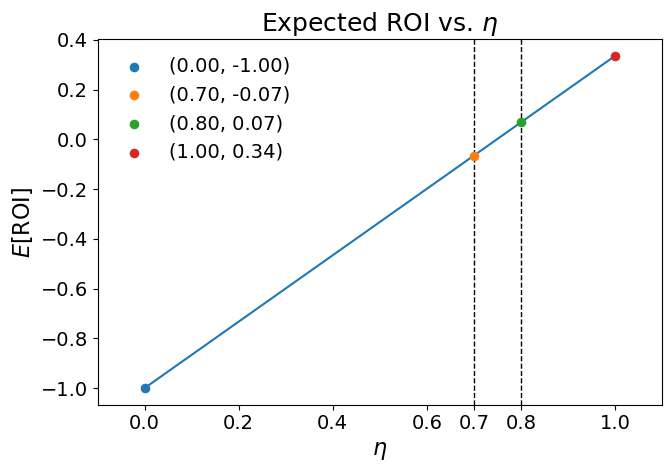

In [5]:
e_roi = expected_roi(eta, params)

plt.figure(figsize=(7, 5))
plt.plot(eta, e_roi)
plt.axvline(params.L, color="black", linestyle="--", linewidth=1)
plt.axvline(params.U, color="black", linestyle="--", linewidth=1)
mark_points(eta, e_roi, [eta[0], params.L, params.U, eta[-1]])
set_eta_ticks(params)
plt.xlim(-0.1, 1.1)
plt.xlabel(r"$\eta$")
plt.ylabel(r"$E[\mathrm{ROI}]$")
plt.title(r"Expected ROI vs. $\eta$")
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig(out_dir / "roi_expected.svg")
plt.show()


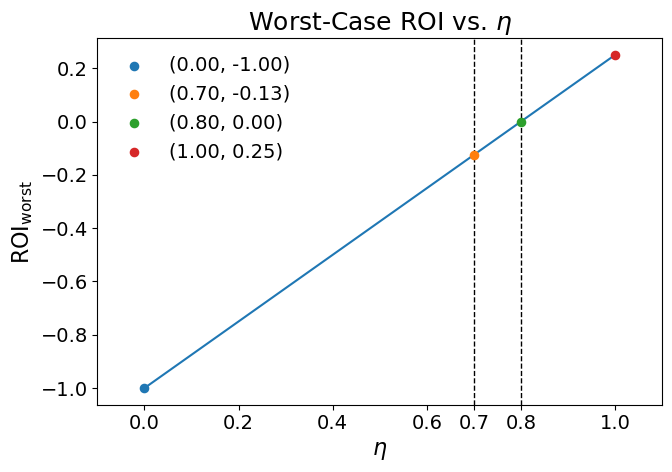

In [6]:
roi_worst = worst_roi(eta, params)

plt.figure(figsize=(7, 5))
plt.plot(eta, roi_worst)
plt.axvline(params.L, color="black", linestyle="--", linewidth=1)
plt.axvline(params.U, color="black", linestyle="--", linewidth=1)
mark_points(eta, roi_worst, [eta[0], params.L, params.U, eta[-1]])
set_eta_ticks(params)
plt.xlim(-0.1, 1.1)
plt.xlabel(r"$\eta$")
plt.ylabel(r"$\mathrm{ROI}_{\mathrm{worst}}$")
plt.title(r"Worst-Case ROI vs. $\eta$")
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig(out_dir / "roi_worst.svg")
plt.show()
